### Objective
### This file treats the data and provides the dataframe to be employed for the study.
### Here all features of the initial dataframe are  vectorized.

In [1]:
#pip install import-ipynb

In [2]:
import pandas as pd
import numpy as np
#import math

import import_ipynb

from cc_fi_variable_initializations import *
import cc_fi_fcts

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

importing Jupyter notebook from cc_fi_variable_initializations.ipynb
importing Jupyter notebook from cc_fi_fcts.ipynb


 ### Problem   

### Data  related with bank marketing, based on phone calls, aiming at client subscription to bank products  (the so called term deposits) is provided. The purpose of this work is to predict whether a client will  accept/reject the subscription using  models employing the following supervised ML classifiers: KNN, Logisitic Regression, Decision Tree, Support Vector Machine.

### Read the Data and store it in a dataframe

In [3]:

df=pd.read_csv('data/bank-additional-full.csv', sep = ';')

#print the five first rows  of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#print the name of all the 21 columns (fearures) of the dataframe
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#the dimension of the dataframe, ,umber of rows, columns
df.shape

(41188, 21)

In [6]:
#information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#Missing Values: O we se that from info function or by 
#percentage of missing values per column (feature)
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

### Examining the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [8]:
#from df.info() we saw that there are numer and object type features.
#from df.info  and/or percent_missing = df.isnull().sum() * 100 / len(df)
#we saw that there are no missing values 

### Business Objective of the Task


In [9]:
#Objectif: 
#predict y: the success of telemarketing calls for selling bank long-term deposits, 
#using sample features and  compare methods
#k nearest neighbors, Logisitic regression, decision trees, support vector machine
#in other words
#classify a sample as succesful or not succesful 
#depending upon whether the client as the  client subscribed a term deposit
#according to 
#k nearest neighbors, Logisitic regression, 
#decision trees, support vector machine.

#df_features=dataframe with all the features without the target variable
df_features=df.iloc[:,0:20]

#dftarget_y= the target variable
dftarget_y=df[['y']]

df_features.columns,dftarget_y, dftarget_y['y'].unique(), dftarget_y['y'].value_counts(normalize=True)

(Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed'],
       dtype='object'),
          y
 0       no
 1       no
 2       no
 3       no
 4       no
 ...    ...
 41183  yes
 41184   no
 41185   no
 41186  yes
 41187   no
 
 [41188 rows x 1 columns],
 array(['no', 'yes'], dtype=object),
 no     0.887346
 yes    0.112654
 Name: y, dtype: float64)

### Data Treatment
### First Step for Feature Engineering: Data Vectorization-Transforming Object Type  Variables to Numeric Ones

In [10]:
v_dataframe=df
v_name_column_to_vectorize="y"
v_name_vectorized_column="y1"

### Data Vectorization Through Target Encoder using skLearn LeaveOneOut encoder.
### Alternatively, different approaches can be also employed (other target encoders , OneHotEncoder increasing the number of features etc.)

In [11]:
#we vectorize the target column since 
#a target beased encoder will be employed
#to vectorize the dataframe

df_with_target_vectorized=\
cc_fi_fcts.fct_vectorize_binary_column(\
val_name_dataframe=v_dataframe,\
val_name_column_to_vectorize=v_name_column_to_vectorize,\
val_name_vectorized_column=v_name_vectorized_column)


##or we could have vectorized the target variable  y with map function
#df_basic_with_target["y"].map({'no': 0, 'yes': 1})


#the columns of the dataframe after vectorizing the target y
#we see there is a new variable y1 which is the vectorization of the target.
df_with_target_vectorized.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y1'],
      dtype='object')

In [12]:
#information on the vectorized dataframe
df_with_target_vectorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
#we vectorize the datframe all columns but the target y
#we already have the target vectorized in column y1

df_with_target_all_vectorized=cc_fi_fcts.fct_target_vectorization_obj_cols_df(\
val_dataframe=df_with_target_vectorized,\
val_name_vectorized_target_variable=v_name_vectorized_column,
val_name_non_vectorized_target=v_name_column_to_vectorize)


df_with_target_all_vectorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
#we save the vectorized dataframe df_with_target_vectorized
#as df_with_target_vectorized.pkl 
#if we need them we reload them back (df= pd.read_pickle("my_df_b.pkl")

#df_with_target_vectorized.to_pickle("val_name_dataframe_for_pickle")
df_with_target_all_vectorized.to_pickle(val_name_df_with_target_all_vectorized_for_pickle)

In [15]:
#the dataframe with numeric values
#we remover the categorical version of the target
df_num=df_with_target_all_vectorized.drop("y",axis=1)


In [16]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
#we save in memory the numeric dataframe too
df_num.to_pickle(val_name_numeric_dataframe_for_pickle)

In [18]:
v_feature_keys_1=df_num.columns.tolist()

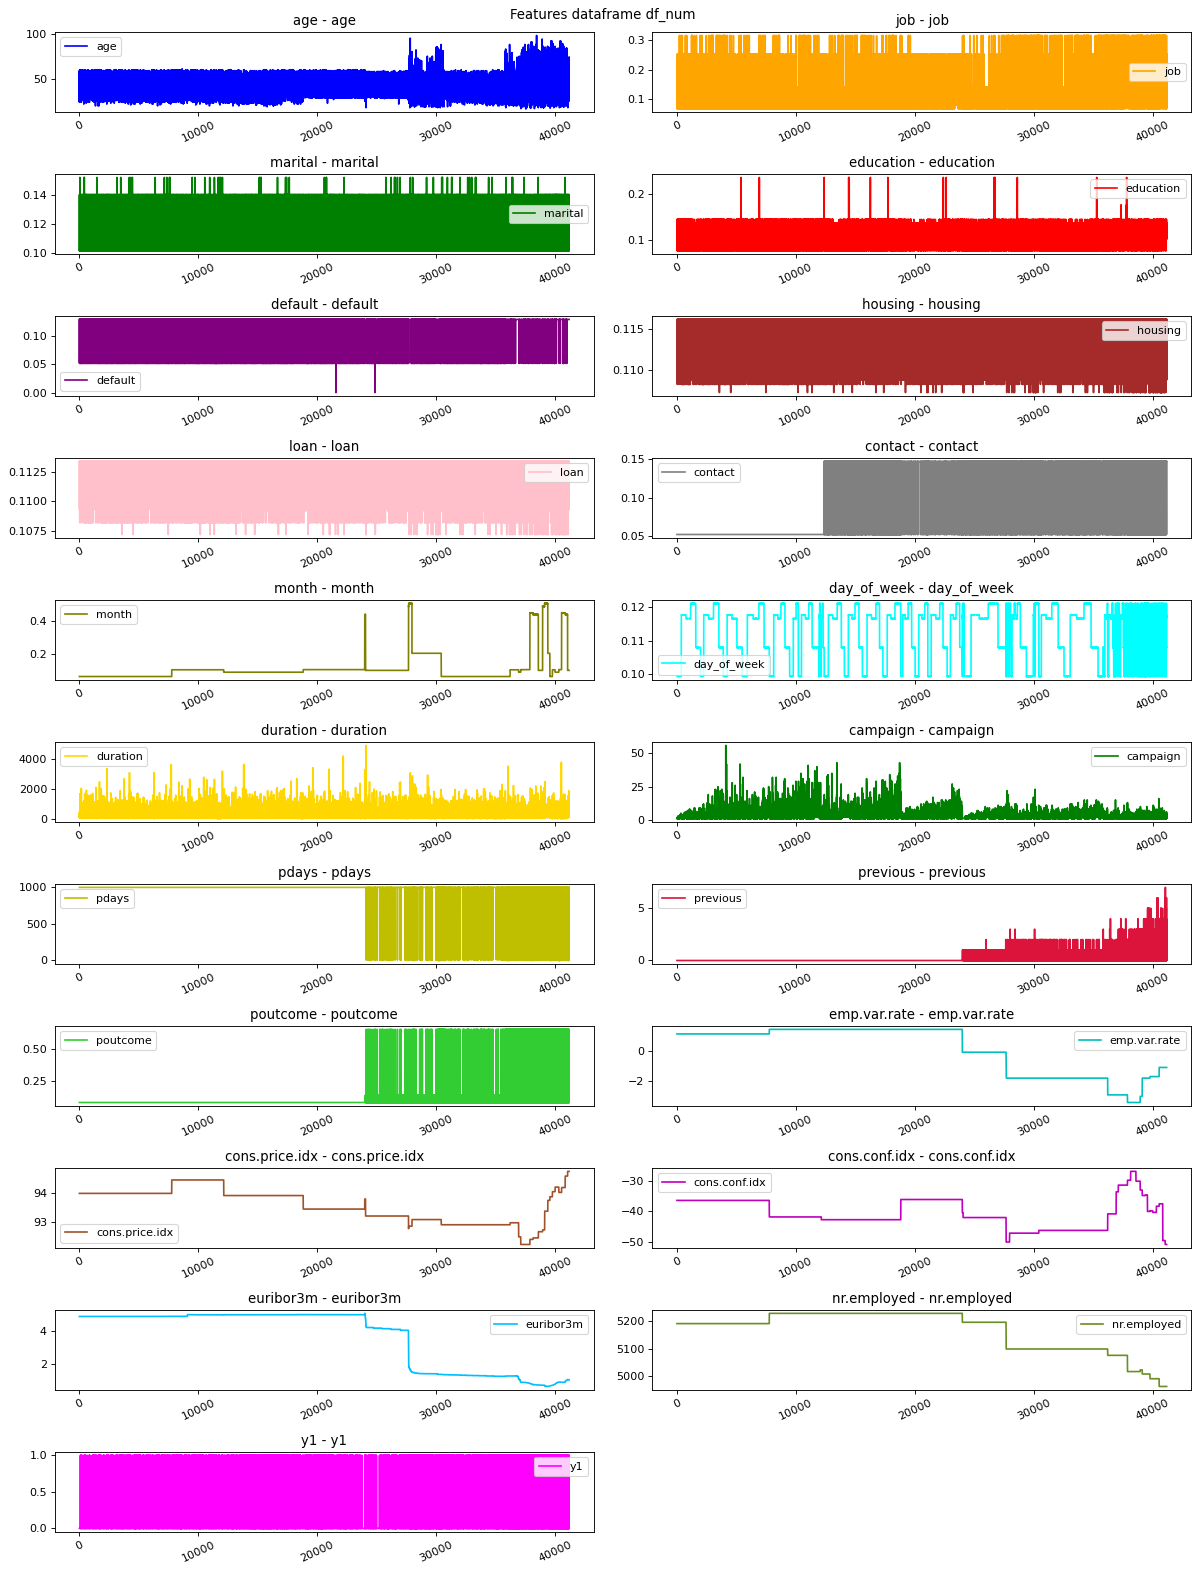

In [19]:
#we plot the features
cc_fi_fcts.fct_show_raw_visualization(
data=df_num,
feature_keys=v_feature_keys_1,
titles=v_feature_keys_1,
colors=val_colors_for_feature_subplots,
v_cols=v_cols_for_all_features_subplots,
v_name_dataframe="df_num")

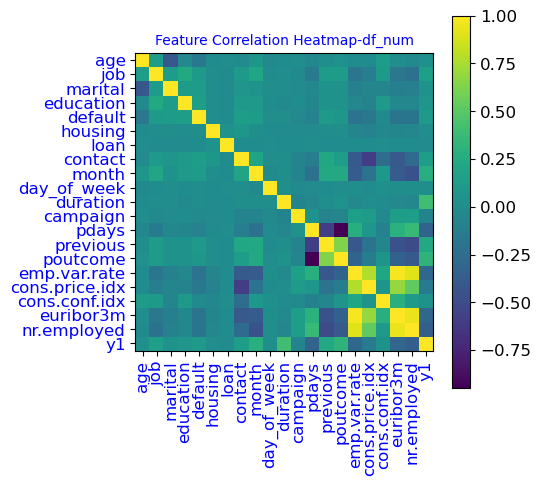

In [20]:
#plot of the feature heatmap for df_num
cc_fi_fcts.fct_show_feature_heatmap(\
data=df_num,\
val_name_dataframe="df_num")

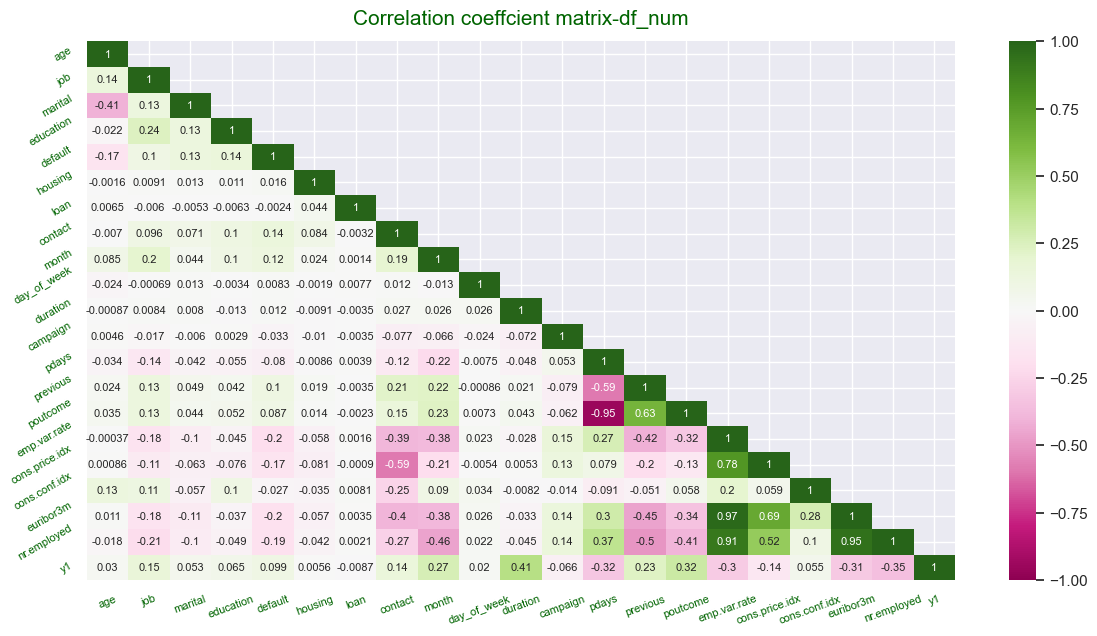

In [21]:
#plot of the correlation matrix for df_num
cc_fi_fcts.fct_show_cor_coef_matrix(\
val_data=df_num,\
val_name_dataframe="df_num")

<Figure size 640x480 with 0 Axes>

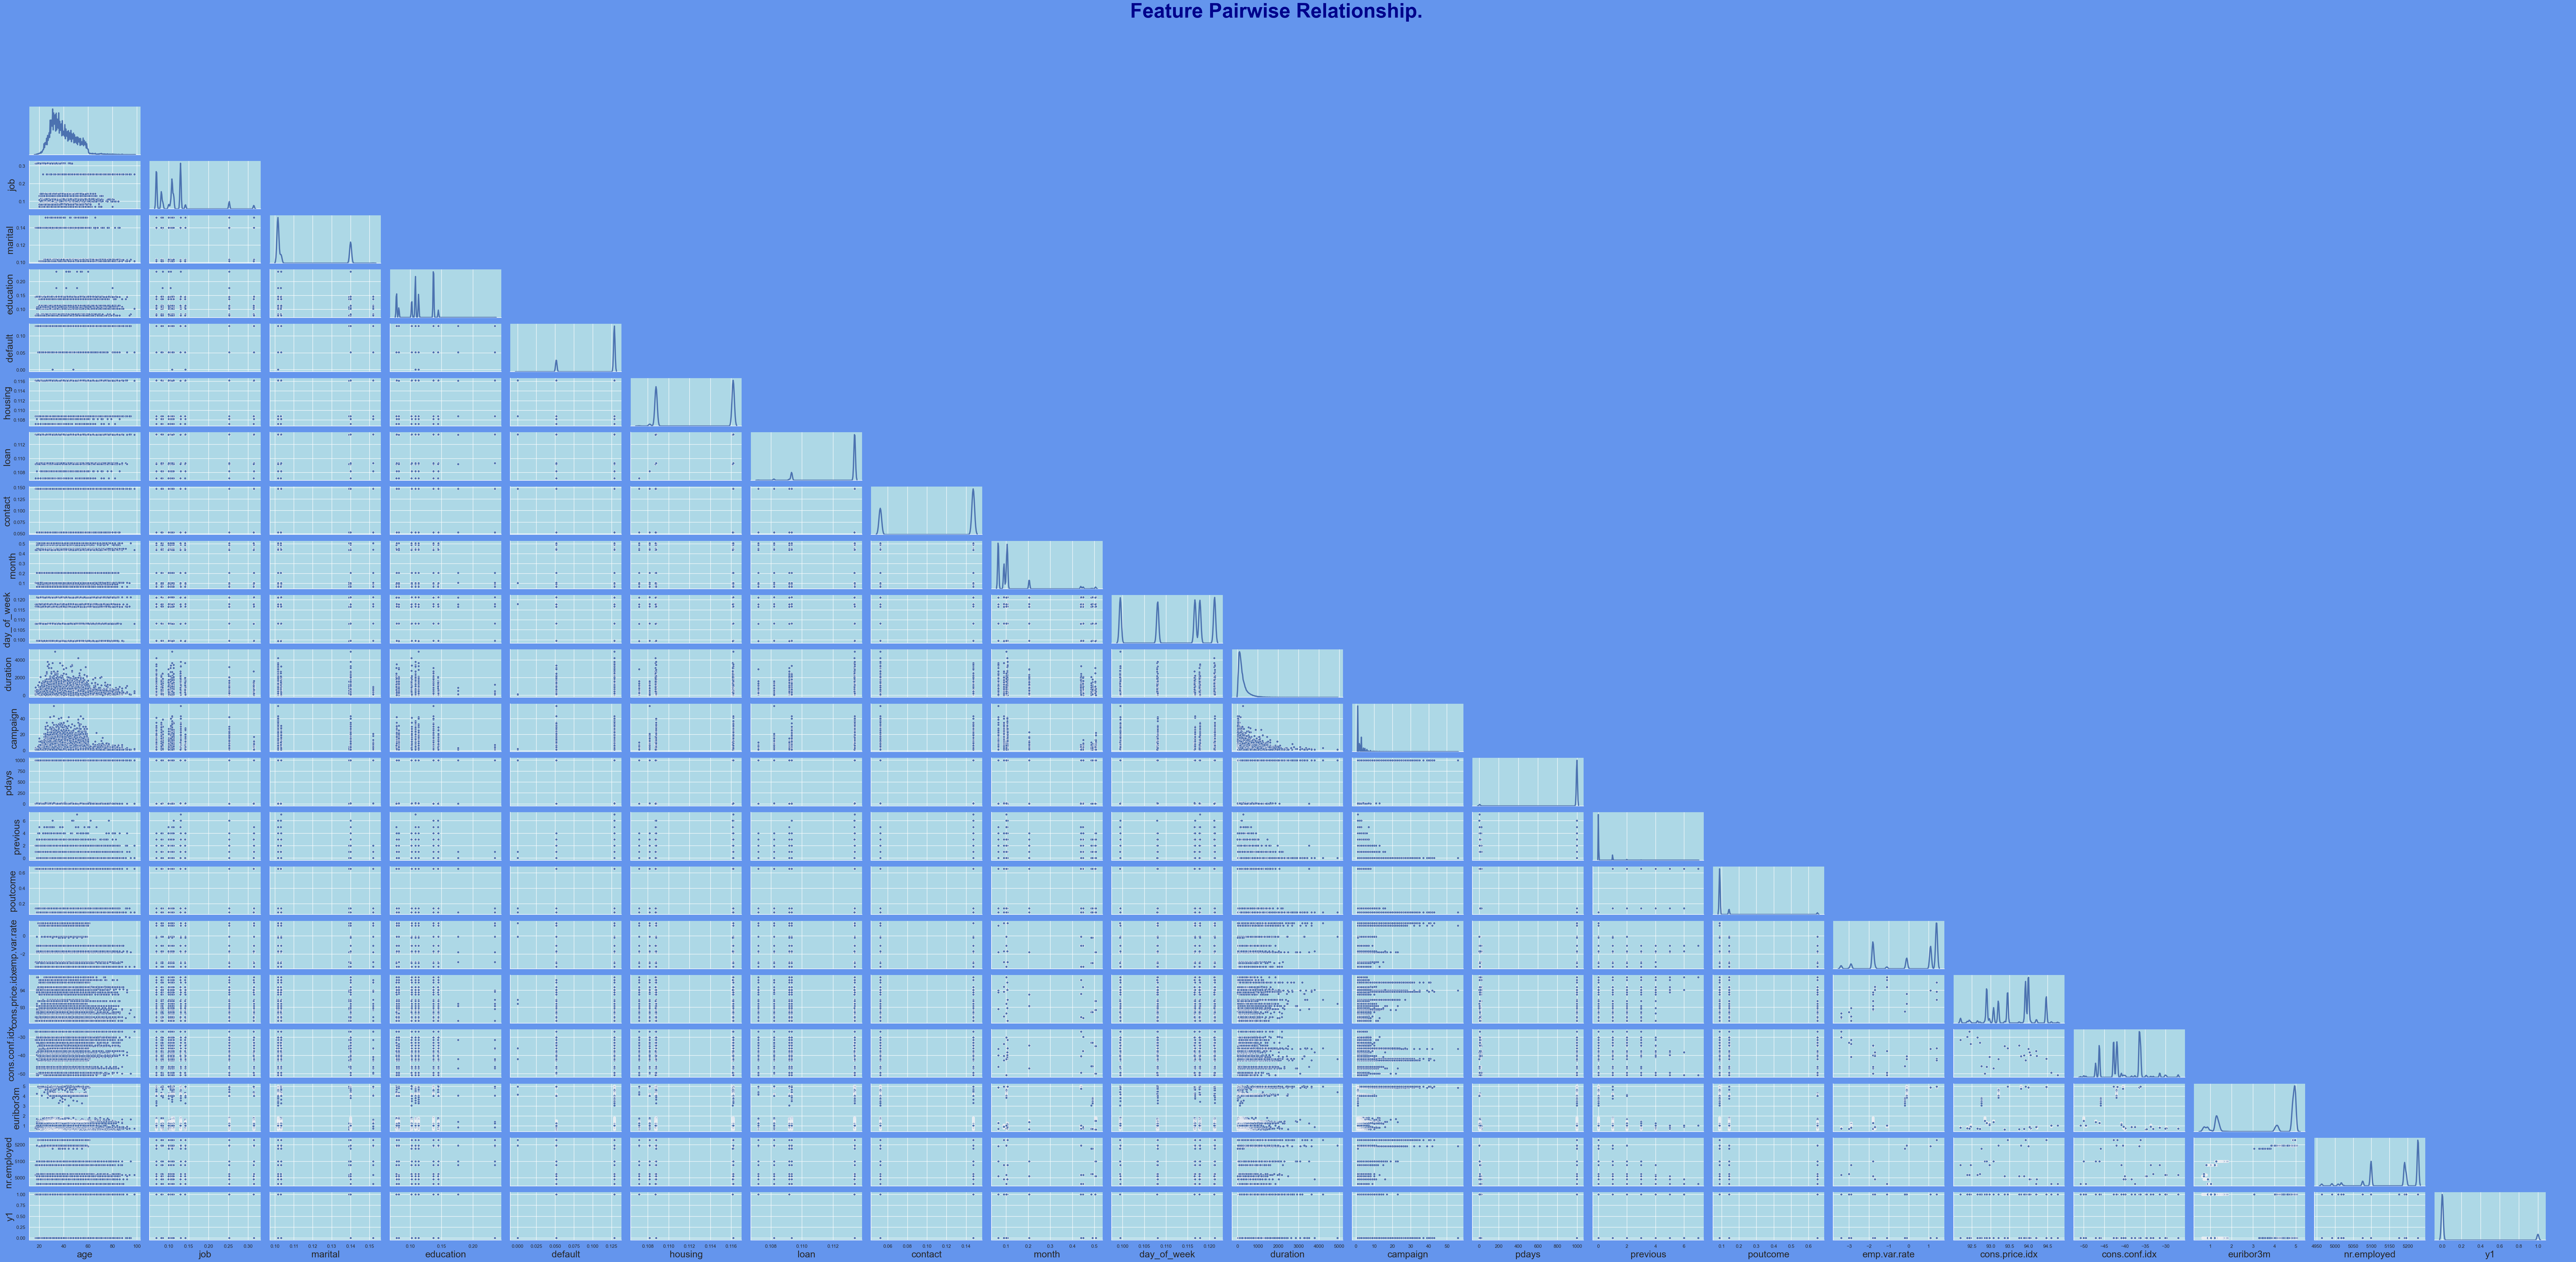

In [22]:
v_data=df_num

#*Pairgrid
sns.set(style="darkgrid")

res=sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'cornflowerblue'})

fig=plt.figure()
#fig=plt.figure(figsize=(22,167))
plt.rcParams["axes.labelsize"] =22


#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
#palette="viridis",palette="colorblind",palette="dark"
#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'cornflowerblue'})
g = sns.PairGrid(v_data,diag_sharey=False,height=2, aspect=2,corner=True)
#g = sns.PairGrid(penguins_1, hue="sex",)
g.map_diag(sns.kdeplot,lw=3,bw_adjust=.25)
g.map_offdiag(sns.scatterplot,s=30)
g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
#plt.xticks(rotation=70)

g.fig.suptitle('Feature Pairwise Relationship.',fontsize=47,weight="bold",c="darkblue")
#plt.savefig("Figures/fig_pairgrid_density_diagonal.png")
plt.show()